<a href="https://colab.research.google.com/github/HSE-LAMBDA/DeepGenerativeModels/blob/master/homeworks/VAE-homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install comet-ml
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="lODeHEtCf7XLaV6DJrOfugNcA",
                        project_name="hse-vae-hometask", workspace="holybayes")

import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torchvision.utils import make_grid


seed=1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

     |████████████████████████████████| 184kB 3.4MB/s 
     |████████████████████████████████| 204kB 34.9MB/s 
     |████████████████████████████████| 409kB 62.5MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=a16b8b70bc3c939a11efa7380eaca02b49c7b6ba5e97f6407eb29eb5023e72cf
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/holybayes/hse-vae-hometask/6f0114f190774711b471cece7dd8896d



# Cats vs. Dogs
![](https://upload.wikimedia.org/wikipedia/ru/5/57/CatDog.GIF)
Задача домашки - научиться генерить собак, кошек ~~и котопсов~~ с помощью Conditional VAE

In [3]:
# загрузим данные. Не забудьте принять правила соревнования! https://www.kaggle.com/c/dogs-vs-cats/rules
# !pip install --upgrade --force-reinstall --no-deps kaggle
!KAGGLE_USERNAME=<user> KAGGLE_KEY=<token> kaggle competitions download -c dogs-vs-cats

/bin/bash: user: No such file or directory


# Dataset

In [4]:
!unzip dogs-vs-cats.zip
!unzip train.zip > /dev/null

Archive:  dogs-vs-cats.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               
replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [0]:
from torch.utils.data import Dataset
import os
from skimage import io
import random
import numpy as np

n_classes = 2

class CatsVsDogsDataset(Dataset):
    def __init__(self, root_dir, transform=None, soft_labels=0):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(self.root_dir)
        self.soft_labels = soft_labels # soft labeling

    def __len__(self):
        return len(self.images) # число картинок в директории

    def __getitem__(self, idx):
        ??? # your code here
#         tips: 
#             1. use one-hot encoded labels. Soft one-hot encoding means one-hot labels like [0.3, 0.7]. Parameter self.soft_labels defines maximum relaxation of labels (0.0 means hard one-hot encoding)
#             2. use skimage.io to read the images 
        sample = {'image': image, 'label': label_onehot, 'filename': img_name}
        if self.transform:
            sample['image'] = self.transform(sample['image'])
        return sample

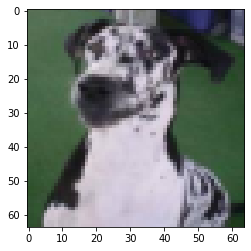

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader
img_size = 64
transforms = ??? # define all transforms here
dataset = CatsVsDogsDataset('train/', transforms)

batch_size=64
kwargs = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {}
dataloader = DataLoader(dataset, shuffle=True, batch_size=batch_size, **kwargs)

plt.imshow(dataset[0]['image'].permute([1,2,0]))

## VAE model

In [0]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Encoder
        ??? # write your code here
        
        # Decoder
        ??? # write your code here
        

    def encode(self, x, label):
        x = x.view(-1,3*img_size**2)
        x = torch.cat([x, label], 1)
        ??? # write your code here
        return mu, sigma

    def reparameterize(self, mu, logvar):
        ??? # write your code here
        

    def decode(self, z, label):
        z = torch.cat([z,label], 1)
        ??? # write your code here
        

    def forward(self, x, label):
        mu, logvar = self.encode(x, label)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, label), mu, logvar
    
    def sample(self, size, label=None):
        if label is None: ??? # write your code here
        sample = torch.randn(size, 20).to(self.device)
        return model.decode(sample, label)
    
    @property
    def device(self): return next(self.parameters()).device


model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

## Train VAE

In [0]:
def loss_function(recon_x, x, mu, logvar):
    ??? # write your code here
#     tip: loss function is the same as in VAE


log_interval=10
epochs=10

def train(epoch):
    ??? # write your code here

for epoch in range(1, epochs + 1):
    train(epoch)
    with torch.no_grad():
        sample = model.sample(64).cpu()
        log_img = make_grid(sample.view(-1,3,img_size,img_size)).permute((1,2,0))
        experiment.log_image(log_img,name='vae/sample',step=epoch)

====> Epoch: 1 Average loss: 463.9490
====> Epoch: 2 Average loss: 318.4449
====> Epoch: 3 Average loss: 301.9435
====> Epoch: 4 Average loss: 294.0609
====> Epoch: 5 Average loss: 289.0439
====> Epoch: 6 Average loss: 286.6501
====> Epoch: 7 Average loss: 285.0399


# Баллы
* Правильно написанный датасет - 1 балл
* Правильно реализованная модель VAE - 2 балла
* Написан код для обучения, модель чему-то обучается - 2 балла
* ВАЕ семплит адекватные картинки - 2 балла
* Проверено, насколько софт-лейблинг докидывает или не докидывает к качеству модели - 2 балла
* Получился котопёс - 1 балл

# Links

[C-VAE](https://wiseodd.github.io/techblog/2016/12/17/conditional-vae/)